<h2>In this notebook I will be going over the dataset of the World Happiness Index of 2019 to try and determine specific factors that correlate to a high happiness index. </h2> <br>

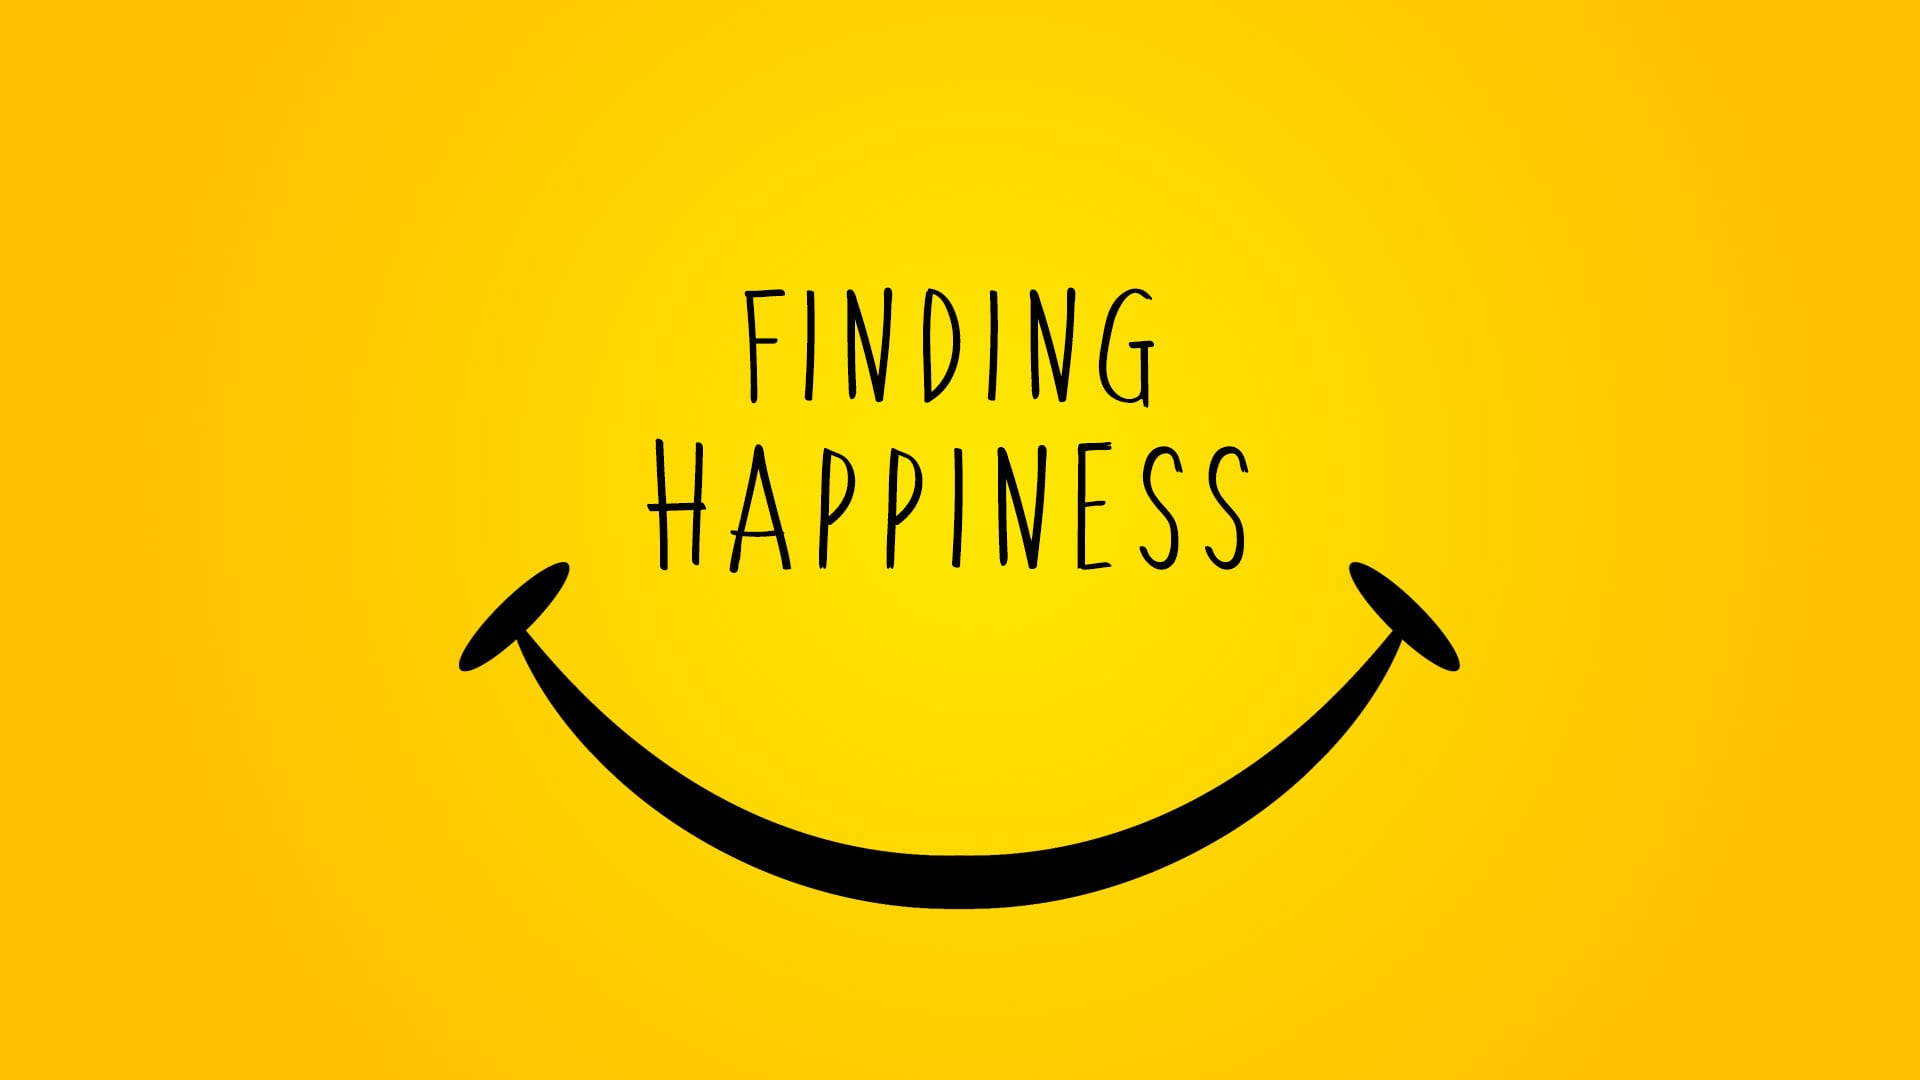

<h2> <u>Problem Definition</u> </h2> 

<h3> I am trying to find which factors have the highest correlation to a high happiness score. Obviously, if a category like "Healthy Life Expectancy" has a low value then that will have a bad correlation to the happiness score. But what I am most interested in though is which column with a high value will still have a bad correlation to the happiness score.</h3>

<h2> <u>Exploratory Data Analysis</u> </h2> 

<h3> Here are the different features that make up the dataset that I am using. I will also drop the Country or region column with the country names and the overall rank column because it won't add anything to help the model.</h3>


<h3> I will be using the "Score" feature as my predictor variable. </h3>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df = pd.read_csv('WorldHappinessIndex2019.csv', delimiter=",")
df.drop(df.columns[0], axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


<h3> Shown below is the overall description of the entire dataset. As you can see the standard deviations of each column are relativey
small. Also, the overall mean of the 'Score' column is 5, with the #1 country being at 7.769 so the mean of the world happiness score isn't too bad. </h3>

In [33]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


<h3> You can also see that there are a couple columns that have a minimum value of 0 which we dont want, so we will impute based on the average of the values above and below the 0.</h3>

<h3> Below is where I impute the data and then if we call the same function used above, it will show that there are no more 0 values. </h3>

In [34]:
# This replaces all zeroes with nan

import numpy as np
df[df.eq(0)] = np.nan

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4)
df = pd.DataFrame(imputer.fit_transform(df))

df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))
df.columns = ['Score','GDP per capita','Social support', 'Healthy life expectancy'
              , 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

<h2><u>Feature Segmentation</u></h2>

In [35]:
import pandas as pd

# pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

# # Create data frame without ID and target variable columns.

# del df['Satisfaction']

# Display all columns of the data frame.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df.head(2))

# Bartlett's test of sphericity checks for enough correlation.
# A small p-value indicates that enough correlation exists.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value=calculate_bartlett_sphericity(df)

print("\nBartlett's test chi-square value: ")
print(chi_square_value)

print("\nBartlett's test p-value: ")
print(p_value)

# Kaiser-Meyer-Olkin (KMO) test checks for common variance.
# Factor analysis is suitable for scores of 0.6 (and
# sometimes 0.5) and above.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print("\nKaiser-Meyer-Olkin (KMO) Test")
print(kmo_model)

# Create components loading vectors without rotation
# and obtain the Eigenvalues.
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

ev, v = fa.get_eigenvalues()
print("\nEignenvalues:")
print(ev)

# Pick factors where eigenvalues are greater than 1.
fa = FactorAnalyzer(rotation="varimax",n_factors=2)
fa.fit(df)

# Create formatted factor loading matrix.
dfFactors = pd.DataFrame(fa.loadings_)
dfFactors['Categories'] = list(df.keys())
dfFactors = dfFactors.rename(columns={0:'Factor 1',
          1:'Factor 2', 2:'Factor 3', 3:'Factor 4'})
print("\nFactors: ")
print(dfFactors)



   Score  GDP per capita  Social support  Healthy life expectancy  Freedom to make life choices  Generosity  Perceptions of corruption
0  7.769           1.340           1.587                    0.986                         0.596       0.153                      0.393
1  7.600           1.383           1.573                    0.996                         0.592       0.252                      0.410

Bartlett's test chi-square value: 
679.3983260724755

Bartlett's test p-value: 
1.4473011708827272e-130

Kaiser-Meyer-Olkin (KMO) Test
0.8340585223845255

Eignenvalues:
[3.82509495 1.41951341 0.61521633 0.56875235 0.25842885 0.17118771
 0.14180641]

Factors: 
   Factor 1  Factor 2                    Categories
0  0.868441  0.319160                         Score
1  0.915752  0.068961                GDP per capita
2  0.835244  0.073839                Social support
3  0.885019  0.099383       Healthy life expectancy
4  0.411562  0.553433  Freedom to make life choices
5 -0.115293  0.564996 

<h3> The features that influence the first factor are a good GDP per capita, Social support, and Healthy life expectancy. This could be an indicator that companies with good social programs correlate to a good happiness score. For the second factor, the features that are most relevant are Freedom to make life choices, Generosity, and Perceptions of corruption. This could be a good indicator that first world countries that prioritize democracy and safety of their citizens correlate to a good happiness score. </h3>

<br>
<h2><u>Data Treatment</u></h2>
<h3>I initially dropped the first two columns which are the index and the name of the country, since I don't think they would have any influence on the model. Also, some columns would have a 0 as the minimum value, which I did not want in my model because I don't think that a 0 is a legit value. So I used the KNN Imputer to get the average of the 4 neighbors around the 0 value. I also used binning to see if there was a specific range of values that helped the RMSE value. The ranges that I determined were the most helpful are GDPBin_(0.912, 1.684], SocialBin_(1.2, 1.624]. Considering the origin columns had significant p-values, it makes sense that only the binning for these two columns had the best results.</h3>

<h3> Now I am going to run an OLS model to find the bad features then bin the good features and run the OLS model again.  </h3>

In [36]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm

X = df[['GDP per capita', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.56e-40
Time:                        17:29:16   Log-Likelihood:                -89.887
No. Observations:                 124   AIC:                             189.8
Df Residuals:                     119   BIC:                             203.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9787      0.213      9.300      0.0

<h3> Shown in the model summary is that there are a couple of features that don't provide any good insight into our prediction so we can drop those features and then also bin the good categories to see if that will have a positive effect on the RMSE. </h3>

In [37]:
df['GDPBin'] = pd.cut(x=df['GDP per capita'], bins=[0,0.3,0.71,0.912, 1.684])
df['SocialBin'] = pd.cut(x=df['Social support'], bins=[0,0.572,1.2,1.624])

tempDf = df[['GDPBin','SocialBin']]

dummyDf = pd.get_dummies(tempDf, columns=['GDPBin','SocialBin'])

df = pd.concat(([df, dummyDf]),axis=1)


In [38]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm



X = df[['Freedom to make life choices','Perceptions of corruption','GDPBin_(0.0, 0.3]',
        'GDPBin_(0.3, 0.71]','GDPBin_(0.71, 0.912]','GDPBin_(0.912, 1.684]','SocialBin_(0.0, 0.572]','SocialBin_(0.572, 1.2]',
        'SocialBin_(1.2, 1.624]']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     50.47
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           2.59e-32
Time:                        17:29:16   Log-Likelihood:                -102.80
No. Observations:                 124   AIC:                             221.6
Df Residuals:                     116   BIC:                             244.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4116      0.104     23.124      0.0

<h3> With a bit of binning, you can already see the RMSE value drop by .02 points. Now let's drop the bad features and see if the RMSE improves at all. </h3>

In [39]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api       as sm



X = df[['Freedom to make life choices','Perceptions of corruption',
        'GDPBin_(0.912, 1.684]',
        'SocialBin_(1.2, 1.624]']].values

# Adding an intercept *** This is required ***. Don't forget this step.
# The intercept centers the error residuals around zero
# which helps to avoid over-fitting.
X = sm.add_constant(X)
y = df['Score'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model
print(model.summary())
print('Root Mean Squared Error:',
      np.sqrt(metrics.mean_squared_error(y_test, predictions)))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     85.10
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           5.60e-34
Time:                        17:29:16   Log-Likelihood:                -105.69
No. Observations:                 124   AIC:                             221.4
Df Residuals:                     119   BIC:                             235.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4199      0.150     22.795      0.0

<h3>The conclusion is that the features that are the most relevant are 'Freedom to make life choices' and 'Perceptions of corruption' while the values of GDP per capita give best results between 0.912 and 1.684, also the values of Social support give the best result between 1.2 and 1.624 </h3>

<h3> Now let's look at making a neural net and see if the RMSE value improves at all. </h3>

In [40]:
df.drop(df.columns[4], axis=1, inplace=True)
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,GDPBin,SocialBin,"GDPBin_(0.0, 0.3]","GDPBin_(0.3, 0.71]","GDPBin_(0.71, 0.912]","GDPBin_(0.912, 1.684]","SocialBin_(0.0, 0.572]","SocialBin_(0.572, 1.2]","SocialBin_(1.2, 1.624]"
0,7.769,1.340,1.587,0.986,0.153,0.393,"(0.912, 1.684]","(1.2, 1.624]",0,0,0,1,0,0,1
1,7.600,1.383,1.573,0.996,0.252,0.410,"(0.912, 1.684]","(1.2, 1.624]",0,0,0,1,0,0,1
2,7.554,1.488,1.582,1.028,0.271,0.341,"(0.912, 1.684]","(1.2, 1.624]",0,0,0,1,0,0,1
3,7.494,1.380,1.624,1.026,0.354,0.118,"(0.912, 1.684]","(1.2, 1.624]",0,0,0,1,0,0,1
4,7.488,1.396,1.522,0.999,0.322,0.298,"(0.912, 1.684]","(1.2, 1.624]",0,0,0,1,0,0,1


<h3> We first have to find our baseline rmse value is using a Neural network. </h3>

In [41]:
import pandas as pd
import numpy  as np
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from keras.models            import Sequential
from keras.layers            import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

dataset = df.values
X       = dataset[:, 1:6]  # Columns 1 to 4
y       = dataset[:,0] #predictor


ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)


# Split the data.
X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped, 
         y_arrayReshaped, test_size=0.2, random_state=0)

# Define the model.
def create_model():
   model = Sequential()
   model.add(Dense(4, input_dim=4, kernel_initializer='normal', 
             activation='relu'))
   model.add(Dense(1, kernel_initializer='normal'))
   model.compile(loss='mean_squared_error', optimizer='adam')
   return model

# Since this is a linear regression use KerasRegressor.
estimator = KerasRegressor(build_fn=create_model, epochs=100,
                           batch_size=5, verbose=1)

# Use kfold analysis for a more reliable estimate.
kfold   = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline Mean (%.2f) MSE (%.2f) " % (results.mean(), results.std()))
print("Baseline RMSE: " + str(np.sqrt(results.std())))

# Build the model.
model   = create_model()
history = model.fit(X_train, y_train, epochs=100,
                    batch_size=5, verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model.
predictions = model.predict(X_test)
mse         = metrics.mean_squared_error(y_test, predictions)
print("Neural network MSE: " + str(mse))
print("Neural network RMSE: " + str(np.sqrt(mse)))



Baseline Mean (nan) MSE (nan) 
Baseline RMSE: nan


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

<h3> As you can see, for our Neural Network baseline, our RMSE value is similar to the RMSE value for our OLS model. Lets adjust some parameters of the model and try to get the RMSE value down. </h3>

In [ ]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]  # Columns 1 to 4
y       = dataset[:,0] #predictor



ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[ROW_DIM],
                            X.shape[COL_DIM])

# Convert DataFrame columns to vertical columns of target variables values.
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)

X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped,
                      y_arrayReshaped, test_size=0.2, random_state=0)

n_features = X_train.shape[1]

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV
from tensorflow.keras.optimizers import Adam

# Define the model.
def create_model(numNeurons=5, initializer='uniform', activation='softplus'):
    # create model
    model = Sequential()
    model.add(Dense(4, kernel_initializer='uniform',
                    input_dim=n_features, activation='softplus'))
    model.add(Dense(numNeurons, kernel_initializer=initializer,
              activation=activation))

    model.add(Dense(1, kernel_initializer='he_normal',  activation='softplus'))
    opt = Adam(lr=0.008)
    # Compile model
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model

### Grid Building Section #######################
# Define the parameters to try out
params = { 'activation' : ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 
                           'sigmoid', 'hard_sigmoid', 'linear'],
          'numNeurons':[10, 15, 20, 25, 30, 35],
          'initializer': ['uniform', 'lecun_uniform', 'normal', 'zero', 
                       'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
          }

model      = KerasRegressor(build_fn=create_model, epochs=180, 
                            batch_size=110, verbose=1)

from sklearn.model_selection     import RandomizedSearchCV
grid = RandomizedSearchCV(model, param_distributions = params, cv = 3)

#################################################

grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
import pandas                as pd
from sklearn.model_selection import train_test_split


dataset = df.values
X       = dataset[:, 1:6]  # Columns 1 to 4
y       = dataset[:,0] #predictor



X_train, X_test, y_train, y_test = train_test_split(X,
                      y, test_size=0.2, random_state=0)

from keras.models import Sequential
from keras.layers                import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection     import GridSearchCV

from tensorflow.keras.optimizers import SGD   #for adam optimizer
def create_model(learningRate = 0.001):
    model = Sequential()
    model.add(Dense(4, input_dim=4, kernel_initializer='normal',
              activation='relu'))
    model.add(Dense(20, kernel_initializer='normal'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Use Adam optimizer with the given learning rate
    opt = SGD(lr=learningRate)
    model.compile(loss='mse', metrics=['accuracy'], optimizer=opt)
    return model



### Grid Building Section #######################
model = KerasRegressor(build_fn=create_model, epochs=180, batch_size=110, verbose=1)

# Define the grid search parameters.
learningRates= [0.052, 0.06, 0.068]
param_grid   = dict(learningRate=learningRates)
grid         = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#################################################



grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means   = grid_result.cv_results_['mean_test_score']
stds    = grid_result.cv_results_['std_test_score']
params  = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


<h3> When using RandomGridSearch parameters in our model we get an RMSE value of 0.62 so lets do some further grid searching to lower the RMSE. </h3>

In [ ]:
import pandas as pd
import numpy  as np
from sklearn                 import metrics
from sklearn.model_selection import train_test_split
from keras.models            import Sequential
from keras.layers            import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD

dataset = df.values
X       = dataset[:, 1:6]  # Columns 1 to 4
y       = dataset[:,0] #predictor


ROW_DIM = 0
COL_DIM = 1

x_arrayReshaped = X.reshape(X.shape[0], X.shape[1])
y_arrayReshaped = y.reshape(y.shape[ROW_DIM],1)


# Split the data.
X_train, X_test, y_train, y_test = train_test_split(x_arrayReshaped, 
         y_arrayReshaped, test_size=0.2, random_state=0)

# Define the model.
def create_model():
   model = Sequential()
   model.add(Dense(4, input_dim=4, kernel_initializer='normal', 
             activation='relu'))
   model.add(Dense(20, kernel_initializer='normal'))
   model.add(Dense(1, kernel_initializer='normal'))
   opt = SGD(lr=0.06)
   model.compile(loss='mean_squared_error', optimizer=opt)
   return model



# Build the model.
model   = create_model()
history = model.fit(X_train, y_train, epochs=180,
                    batch_size=110, verbose=1,
                    validation_data=(X_test, y_test))

# Evaluate the model.
predictions = model.predict(X_test)
mse         = metrics.mean_squared_error(y_test, predictions)
print("Neural network MSE: " + str(mse))
print("Neural network RMSE: " + str(np.sqrt(mse)))

<h3> After adjusting the Learning Rate, Optimizer, number of neurons, and epochs and batch size, the lowest RMSE that my model could come up with is 0.60. </h3>

<h2> <u>Model Evaluation</u> </h2>
<h3> Out of the 2 models that I tried, the neural net improved the RMSE value from the OLS model from Root Mean Squared Error: 0.6311 to 0.6047. I would say if I spent more time grid searching and trying to find the most optimal parameters that RMSE value would improve to around 0.598. </h3>